In [386]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [387]:
import os

In [388]:
plt.rcParams['font.size'] = 14

In [389]:
import glob

In [390]:
folders = glob.glob("data/*")

In [391]:
folders

['data/teensy41_test_01',
 'data/pyboard_test_02',
 'data/pyboard_test_05_with_Arduino_isrPin',
 'data/pyboard_test_04_with_Arduino_isrPin',
 'data/pyboard_test_03_with_Arduino_isrPin',
 'data/teensy41_test_03',
 'data/teensy41_test_02',
 'data/Raspberry_Pi_test_01',
 'data/pyboard_test_01',
 'data/teensy41_test_03_with_Arduino_isrPin']

## Note

- I made changes to reset the counter so that the test starts with a full time step beginning with `pyboard_test_05_with_Arduino_isrPin`

In [392]:
folder = "Raspberry_Pi_test_01"

In [394]:
folder_path = os.path.join("data",folder)

In [395]:
full_path = os.path.join(folder_path,"digital.csv")

In [397]:
fn = full_path
fn

'data/Raspberry_Pi_test_01/digital.csv'

In [398]:
#fn = "data/teensy41_test_03/digital.csv"

In [399]:
#fn = "data/pyboard_test_05_with_Arduino_isrPin/digital.csv"

In [400]:
import saleae

In [401]:
import importlib

In [402]:
importlib.reload(saleae)

<module 'saleae' from '/Users/kraussry/git/krauss_misc/saleae.py'>

In [403]:
mytest = saleae.saleae_csv(fn)

## Analysis Plan

- test really starts on first ch 0 edge after t=0
- squarewave on ch_0 keeps going after test is over


### Test 1

- what is the period between all edges on ch 0 after t=0?

## Beginning Plot

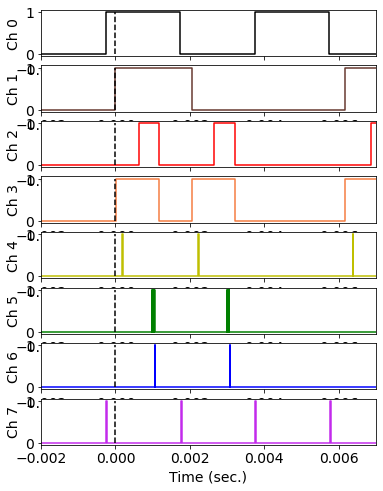

In [404]:
mytest.plot(xlim=[-0.002,0.007],cursor_x=0)

## Big Picture plot

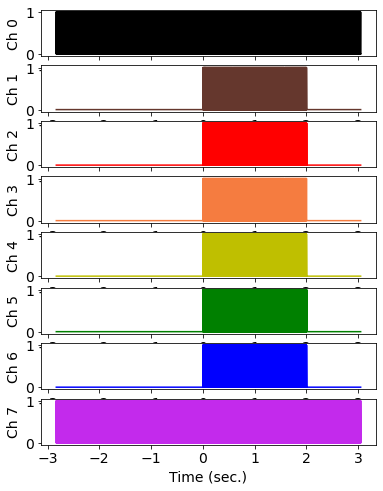

In [405]:
mytest.plot()

## Trying to find the end

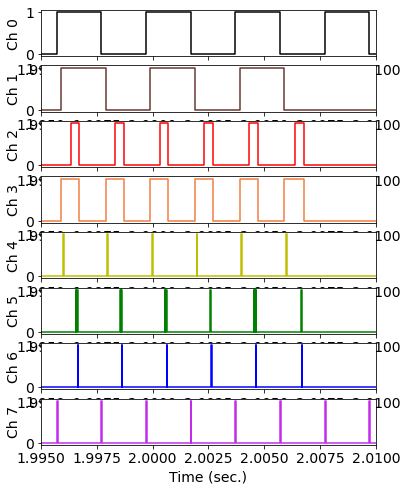

In [418]:
mytest.plot(xlim=[1.995,2.01])

### Ending Note

- there are extra receiving and processing events related to turning the motor off
- the last falling edge on ch_3 is the end of the test for upython
- Arduino still needs to receive and process that last step's i2c transmission
- So, the test ends on the ch_6 falling edge after the last ch_3 falling edge

In [407]:
ch_3 = mytest.ch_3
ch_4 = mytest.ch_4
ch_5 = mytest.ch_5
ch_6 = mytest.ch_6

In [408]:
for i in range(8):
    cmd = "col_%i = mytest.columns[%i]" % (i,i)
    print(cmd)
    exec(cmd)

col_0 = mytest.columns[0]
col_1 = mytest.columns[1]
col_2 = mytest.columns[2]
col_3 = mytest.columns[3]
col_4 = mytest.columns[4]
col_5 = mytest.columns[5]
col_6 = mytest.columns[6]
col_7 = mytest.columns[7]


### Test End based on ch_3

In [409]:
t3_end = col_3.falling_edges[-1]
t3_end

2.00677368

### Test End based on ch_6

- find the next falling edge after `t3_end`

In [412]:
t6_falling = col_6.falling_edges
t6_falling

array([1.06948000e-03, 3.08080000e-03, 7.34204000e-03, 9.12556000e-03,
       1.08007600e-02, 1.29518000e-02, 1.52156800e-02, 1.72607600e-02,
       1.89730000e-02, 2.07518000e-02, 2.27687200e-02, 2.46808000e-02,
       2.67391600e-02, 2.86615200e-02, 3.06917600e-02, 3.27144400e-02,
       3.50887600e-02, 3.72781200e-02, 3.87453200e-02, 4.07952000e-02,
       4.28104400e-02, 4.47309200e-02, 4.69315200e-02, 4.87188800e-02,
       5.07162800e-02, 5.27162400e-02, 5.47117600e-02, 5.67558000e-02,
       5.87244000e-02, 6.07152400e-02, 6.27114400e-02, 6.47079200e-02,
       6.67856800e-02, 6.87174400e-02, 7.07080400e-02, 7.27061200e-02,
       7.47044400e-02, 7.67616000e-02, 7.87341600e-02, 8.07388000e-02,
       8.27078000e-02, 8.47005200e-02, 8.67370400e-02, 8.87182400e-02,
       9.07360000e-02, 9.27080800e-02, 9.47052400e-02, 9.67492400e-02,
       9.87192000e-02, 1.00715720e-01, 1.02716600e-01, 1.04716840e-01,
       1.06724280e-01, 1.08706440e-01, 1.10741080e-01, 1.12698840e-01,
      

In [413]:
t6_falling[-1]

2.00670988

In [414]:
t3_end

2.00677368

In [423]:
t6_end_test = np.any(np.where(t6_falling > t3_end)[0])
t6_end_test

False

In [424]:
if t6_end_test:
    ind_6_end = np.where(t6_falling > t3_end)[0][0]
    t6_end = t6_falling[ind_6_end]
else:
    t6_end = t6_falling[-1]
t6_end

2.00670988

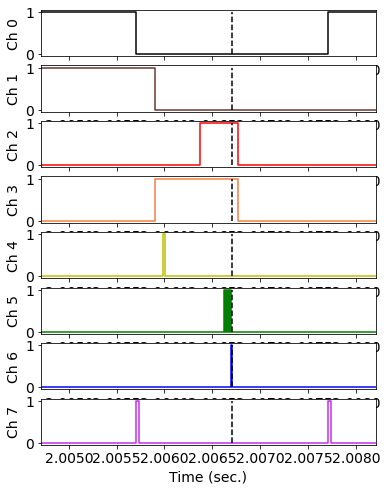

In [425]:
mytest.plot(xlim=[t6_end-0.002,t6_end+0.0015], cursor_x=t6_end)

In [426]:
col_0 = mytest.columns[0]

In [427]:
t_ISR = [t_i for t_i in col_0.change_edges if 0<= t_i < t6_end]
t_ISR = np.array(t_ISR)

In [428]:
t_ISR = np.append([0],t_ISR)

In [429]:
dt = t_ISR[1:] - t_ISR[0:-1]

In [430]:
t_ISR[1:6]

array([0.001745  , 0.00374204, 0.0057514 , 0.00774188, 0.00974088])

In [431]:
t_ISR[0:5]

array([0.        , 0.001745  , 0.00374204, 0.0057514 , 0.00774188])

In [432]:
t_ISR[1:6] - t_ISR[0:5]

array([0.001745  , 0.00199704, 0.00200936, 0.00199048, 0.001999  ])

In [433]:
dt[0:5]

array([0.001745  , 0.00199704, 0.00200936, 0.00199048, 0.001999  ])

In [434]:
dt.argmin()

0

In [435]:
dt.mean()

0.001999699102691924

In [436]:
dt.max()

0.0020434799999999864

In [437]:
dt.min()

0.001745

In [438]:
(dt.mean() - dt.min())*1e6

254.69910269192414

Text(0.5, 0, 'loop count')

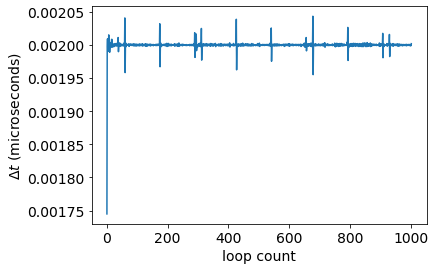

In [439]:
plt.figure()
plt.plot(dt)
plt.ylabel('$\\Delta t$ (microseconds)')
plt.xlabel('loop count')

Text(0.5, 0, 'loop count')

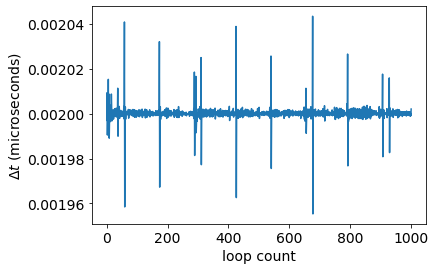

In [440]:
plt.figure()
plt.plot(dt[1:])
plt.ylabel('$\\Delta t$ (microseconds)')
plt.xlabel('loop count')

In [441]:
len(dt)

1003

In [442]:
len(t_ISR)

1004

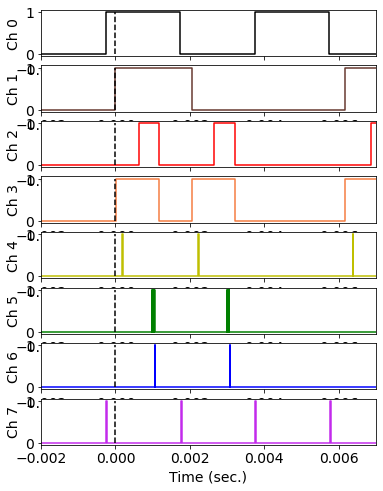

In [443]:
mytest.plot(xlim=[-0.002,0.007],cursor_x=t_ISR[0])

In [444]:
col_6.falling_edges

array([1.06948000e-03, 3.08080000e-03, 7.34204000e-03, 9.12556000e-03,
       1.08007600e-02, 1.29518000e-02, 1.52156800e-02, 1.72607600e-02,
       1.89730000e-02, 2.07518000e-02, 2.27687200e-02, 2.46808000e-02,
       2.67391600e-02, 2.86615200e-02, 3.06917600e-02, 3.27144400e-02,
       3.50887600e-02, 3.72781200e-02, 3.87453200e-02, 4.07952000e-02,
       4.28104400e-02, 4.47309200e-02, 4.69315200e-02, 4.87188800e-02,
       5.07162800e-02, 5.27162400e-02, 5.47117600e-02, 5.67558000e-02,
       5.87244000e-02, 6.07152400e-02, 6.27114400e-02, 6.47079200e-02,
       6.67856800e-02, 6.87174400e-02, 7.07080400e-02, 7.27061200e-02,
       7.47044400e-02, 7.67616000e-02, 7.87341600e-02, 8.07388000e-02,
       8.27078000e-02, 8.47005200e-02, 8.67370400e-02, 8.87182400e-02,
       9.07360000e-02, 9.27080800e-02, 9.47052400e-02, 9.67492400e-02,
       9.87192000e-02, 1.00715720e-01, 1.02716600e-01, 1.04716840e-01,
       1.06724280e-01, 1.08706440e-01, 1.10741080e-01, 1.12698840e-01,
      

In [445]:
t_ISR[0:5]

array([0.        , 0.001745  , 0.00374204, 0.0057514 , 0.00774188])

In [446]:
col_6.falling_edges[0:5]

array([0.00106948, 0.0030808 , 0.00734204, 0.00912556, 0.01080076])

In [449]:
control_ISR_dt = col_6.falling_edges - t_ISR[0:len(col_6.falling_edges)]

## Note

The raspberry pi glitches out for more than one time step, so the subtraction above doesn't fully make sense.  I am not sure how to quantify whether or not the RPi catches back up once is recovers from the glitch.  These leads to more t_ISR events than col_6.falling edges.

Text(0.5, 0, 'Loop Count')

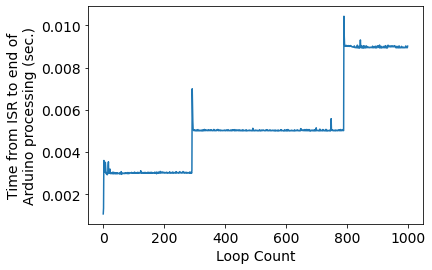

In [450]:
plt.figure()
plt.plot(control_ISR_dt)
plt.ylabel('Time from ISR to end of\nArduino processing (sec.)')
plt.xlabel('Loop Count')

In [451]:
bad_inds = np.where(control_ISR_dt > 0.002)[0]
bad_inds

array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 18

In [452]:
ind0 = np.where(mytest.t>0)[0][0]
ind0

4250

In [453]:
bad_inds_shifted = bad_inds + ind0
bad_inds_shifted

array([4252, 4253, 4254, 4255, 4256, 4257, 4258, 4259, 4260, 4261, 4262,
       4263, 4264, 4265, 4266, 4267, 4268, 4269, 4270, 4271, 4272, 4273,
       4274, 4275, 4276, 4277, 4278, 4279, 4280, 4281, 4282, 4283, 4284,
       4285, 4286, 4287, 4288, 4289, 4290, 4291, 4292, 4293, 4294, 4295,
       4296, 4297, 4298, 4299, 4300, 4301, 4302, 4303, 4304, 4305, 4306,
       4307, 4308, 4309, 4310, 4311, 4312, 4313, 4314, 4315, 4316, 4317,
       4318, 4319, 4320, 4321, 4322, 4323, 4324, 4325, 4326, 4327, 4328,
       4329, 4330, 4331, 4332, 4333, 4334, 4335, 4336, 4337, 4338, 4339,
       4340, 4341, 4342, 4343, 4344, 4345, 4346, 4347, 4348, 4349, 4350,
       4351, 4352, 4353, 4354, 4355, 4356, 4357, 4358, 4359, 4360, 4361,
       4362, 4363, 4364, 4365, 4366, 4367, 4368, 4369, 4370, 4371, 4372,
       4373, 4374, 4375, 4376, 4377, 4378, 4379, 4380, 4381, 4382, 4383,
       4384, 4385, 4386, 4387, 4388, 4389, 4390, 4391, 4392, 4393, 4394,
       4395, 4396, 4397, 4398, 4399, 4400, 4401, 44

In [454]:
t_bad = mytest.t[bad_inds_shifted]
t_bad

array([0.00019636, 0.00063696, 0.00098436, 0.00099172, 0.00100448,
       0.00101188, 0.0010244 , 0.00103184, 0.00104444, 0.00105204,
       0.00105832, 0.00106948, 0.00117664, 0.00117788, 0.001745  ,
       0.00175244, 0.001788  , 0.00205776, 0.00205936, 0.00223076,
       0.00224672, 0.00265484, 0.0029962 , 0.00300368, 0.00301616,
       0.0030236 , 0.00303616, 0.0030436 , 0.0030562 , 0.0030638 ,
       0.00306968, 0.0030808 , 0.00320676, 0.00320788, 0.00374204,
       0.0037494 , 0.00378496, 0.0057514 , 0.00575876, 0.00579436,
       0.00617368, 0.0061752 , 0.00637772, 0.00639368, 0.00685928,
       0.00725728, 0.00726472, 0.0072772 , 0.00728468, 0.00729728,
       0.00730476, 0.0073172 , 0.0073248 , 0.00733092, 0.00734204,
       0.00744356, 0.0074446 , 0.00774188, 0.00774924, 0.0077848 ,
       0.00804748, 0.00804908, 0.0082286 , 0.00824456, 0.00872804,
       0.00903488, 0.00904236, 0.00905496, 0.0090624 , 0.00907488,
       0.00908236, 0.00909488, 0.00910248, 0.0091144 , 0.00912

In [455]:
t_bad = col_6.falling_edges[bad_inds]
t_bad

array([0.00734204, 0.00912556, 0.01080076, 0.0129518 , 0.01521568,
       0.01726076, 0.018973  , 0.0207518 , 0.02276872, 0.0246808 ,
       0.02673916, 0.02866152, 0.03069176, 0.03271444, 0.03508876,
       0.03727812, 0.03874532, 0.0407952 , 0.04281044, 0.04473092,
       0.04693152, 0.04871888, 0.05071628, 0.05271624, 0.05471176,
       0.0567558 , 0.0587244 , 0.06071524, 0.06271144, 0.06470792,
       0.06678568, 0.06871744, 0.07070804, 0.07270612, 0.07470444,
       0.0767616 , 0.07873416, 0.0807388 , 0.0827078 , 0.08470052,
       0.08673704, 0.08871824, 0.090736  , 0.09270808, 0.09470524,
       0.09674924, 0.0987192 , 0.10071572, 0.1027166 , 0.10471684,
       0.10672428, 0.10870644, 0.11074108, 0.11269884, 0.11470068,
       0.11674188, 0.11872308, 0.12080556, 0.12271692, 0.12471408,
       0.12674308, 0.1287196 , 0.13071488, 0.13271388, 0.13471292,
       0.13673416, 0.13871912, 0.14071344, 0.14271184, 0.14473616,
       0.14674644, 0.14872764, 0.15071236, 0.1527198 , 0.15474

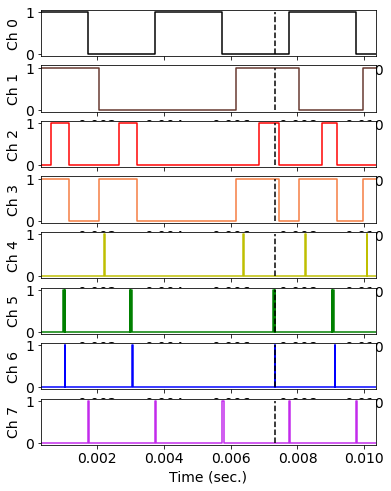

In [458]:
for tb in t_bad[0:1]:
    mytest.plot(xlim=[tb-0.007,tb+0.003],cursor_x=tb)